# A very short notebook to convert EnzymeML Spreadsheets to EnzymeML documents
With a small peek into the timecourse data (?)

### imports

In [1]:
# API
import requests
import json
# Operating system for files
import os
# PyEnzyme
from pyenzyme.enzymeml.tools import EnzymeMLReader
# Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# global Variables
enzmldoc = ''

# Visu
#basic/general settings
sns.set_theme(style="whitegrid", palette ='bright',color_codes=True, context = 'notebook')

### preparing the API

In [2]:
api_url = "http://127.0.0.1:5000/"
# convert xlsm to omex
endpoint_convert = f"{api_url}/template/convert"
# read
endpoint_read = f"{api_url}/read"

### Some functions

In [3]:
def reqConvert(path_xlsm, name_xlsm):
    '''
    API request to convert EnzymeML spreadsheet (xlsm) to EnzymeML document (omex)
    
    Args:
        path_xlsm (string): path to directory with spreadsheet
        name_xlsm (string): name of spreadsheet, with file extension .xlsm
    Returns:
            response_status_code (string): status code of response, 200 everything fine, 500 Error
            response_content (string): binary-formated EnzymeML document
    '''
    payload={}
    files=[
      ('xlsm',(name_xlsm, open(os.path.join(path_xlsm,name_xlsm),'rb'),'application/octet-stream'))
    ]
    headers = {}

    response = requests.request("POST", endpoint_convert, headers=headers, data=payload, files=files)
    return [response.status_code, response.content]


def writeBinary(path, name, inBinary):
    '''
    Writes a binary file like an EnzymeML document (.omex)
    
    Args:
        path (string): path to directory 
        name (string): filename, for an EnzymeML document the file extension must be .omex
        inBinary (string): string with binary content of file
    '''
    f = open(os.path.join(path,name), 'wb')
    f.write(inBinary)
    f.close()

## Convert Spreadsheet to EnzymeML document

#### define path and name

In [4]:
path = './datasets'
name_xlsm = 'ApPDC.xlsm'

reqOMEX = reqConvert(path, name_xlsm)
if reqOMEX[0]==200:
    omexName = os.path.splitext(name_xlsm)[0]+'.omex'
    writeBinary(path, omexName, reqOMEX[1])
    print('EnzymeML document created: '+omexName)
    enzmldoc = EnzymeMLReader().readFromFile(os.path.join(path, omexName))
else:
    print("conversion failed. Error: " + str(reqOMEX[0]))

EnzymeML document created: ApPDC.omex


#### Overview of EnzymeML document

In [5]:
print(enzmldoc)

>>> Units
	ID: u0 	 Name: ml
	ID: u1 	 Name: K
	ID: u2 	 Name: mmole / l
	ID: u3 	 Name: h
	ID: u4 	 Name: min
>>> Reactants
	ID: s0 	 Name: benzaldehyde
	ID: s1 	 Name: benzoin
>>> Proteins
	ID: p0 	 Name: pyruvate decarboxylase
>>> Reactions
	ID: r0 	 Name: Carboligation


#### Short Visualization

In [6]:
# reaction ids
for id_, reac in enzmldoc.getReactionDict().items():
    print(id_)

r0


In [7]:
# one reaction
reaction = enzmldoc.getReaction('r0')
reaction_name = reac.getName()
reac_educts = reac.getEducts()
reac_products = reac.getProducts()

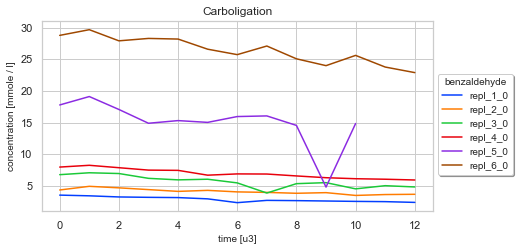

In [8]:
# Educts:
for reactant_id, stoich, _, replicates, init_conc in reac_educts:
        
    # Aus dem Edukt folgt Tuple: 
    # Reactant ID, stoichiometry, Constant, Replikate, Initial-Konzentrationen
        
    if len(replicates) > 0:
            
        df = reaction.exportReplicates(reactant_id)
        time_val = df.index.tolist()
        time = df.index.name.split('/')[0]
        time_unit = df.index.name.split('/')[1]
            
        f, ax = plt.subplots(figsize=(7,3.5))
            
        # Visualisation
        for col in df.columns:
                
            name = enzmldoc.getReactant(col.split('/')[1]).getName()
            unit_name = enzmldoc.getReactant(col.split('/')[1]).getSubstanceUnits()
            unit = enzmldoc.getUnitDict()[unit_name].getName()
                
            sns.lineplot( x=time_val, y=df[col], label = col.split('/')[0] )
            
        #set graph title, legend, axes 
        ax.set_title(reaction_name, fontsize = 12)

        ax.legend(fontsize = 10, \
                    bbox_to_anchor= (1, 0.75), \
                    title= name, \
                    title_fontsize = 10, \
                    shadow = True, \
                    facecolor = 'white');

        xlabel = f"{time} [{time_unit}]"
        ylabel = f"{'concentration'} [{unit}]"

        ax.set_xlabel(xlabel , fontsize=10)
        ax.set_ylabel(ylabel, fontsize=10)

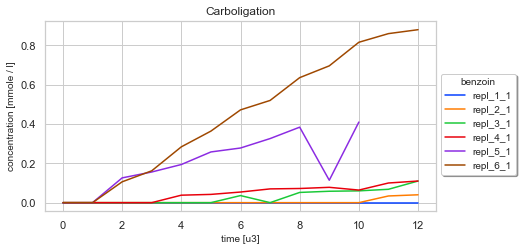

In [9]:
# products
for reactant_id, stoich, _, replicates, init_conc in reac_products:
        
    # Aus dem Edukt folgt Tuple: 
    # Reactant ID, stoichiometry, Constant, Replikate, Initial-Konzentrationen
        
    if len(replicates) > 0:
            
        df = reac.exportReplicates(reactant_id)
        time_val = df.index.tolist()
        time = df.index.name.split('/')[0]
        time_unit = df.index.name.split('/')[1]
            
        f, ax = plt.subplots(figsize=(7,3.5))
            
        # Visualisation
        for col in df.columns:
                
            name = enzmldoc.getReactant(col.split('/')[1]).getName()
            unit_name = enzmldoc.getReactant(col.split('/')[1]).getSubstanceUnits()
            unit = enzmldoc.getUnitDict()[unit_name].getName()
                
            sns.lineplot( x=time_val, y=df[col], label = col.split('/')[0] )
            
        #set graph title, legend, axes 
        ax.set_title(reaction_name, fontsize = 12)

        ax.legend(fontsize = 10, \
                    bbox_to_anchor= (1, 0.75), \
                    title= name, \
                    title_fontsize = 10, \
                    shadow = True, \
                    facecolor = 'white');

        xlabel = f"{time} [{time_unit}]"
        ylabel = f"{'concentration'} [{unit}]"

        ax.set_xlabel(xlabel , fontsize=10)
        ax.set_ylabel(ylabel, fontsize=10)